In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
raw_data = pd.read_csv('data.csv', sep=';')

In [145]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1


In [146]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [147]:
raw_data.SaleCategory.value_counts(dropna=False, normalize=True)

0    0.702055
1    0.297945
Name: SaleCategory, dtype: float64

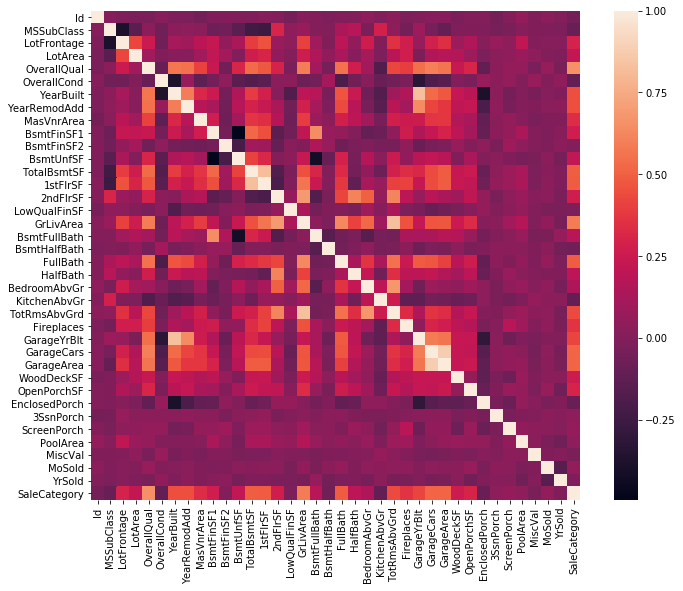

In [148]:
#correlation matrix
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)
plt.show()

In [149]:
df_train = raw_data.copy()
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [150]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [40]:
# df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.5]).index,1)
# for col in ['MasVnrArea', 'MasVnrType', 'Electrical']:
#     df_train = df_train.drop(df_train.loc[df_train[col].isnull()].index)

In [151]:
df_train = df_train.drop(['Id'], axis=1)
df_train_y = df_train.SaleCategory
df_train = df_train.drop(['SaleCategory'], axis=1)
df_train = pd.get_dummies(df_train)

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Text(0, 0.5, 'explained_variance_ratio_')

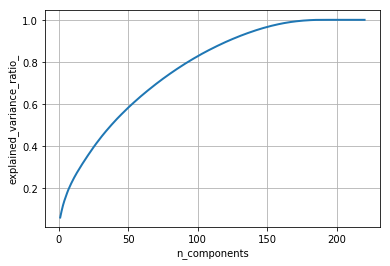

In [160]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaler.fit_transform(df_train))
# pca = PCA().fit(df_train)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [161]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([6.18277512, 3.06470833, 2.68375258, 2.21247413, 1.93579255,
       1.81966796, 1.68455582, 1.45546377, 1.42493888, 1.33140635,
       1.26458163, 1.19194578, 1.1565026 , 1.09759276, 1.08329893,
       1.06777572, 1.04484775, 1.01736015, 1.01428554, 0.99607145,
       0.98496554, 0.97420871, 0.96462902, 0.95519996, 0.93438135,
       0.92585213, 0.89014497, 0.87064193, 0.86379865, 0.85323624,
       0.84362266, 0.81830918, 0.79610649, 0.79498402, 0.77297145,
       0.7625694 , 0.75396243, 0.74355793, 0.73409009, 0.7213303 ,
       0.71723039, 0.69598563, 0.68851555, 0.66695657, 0.66131906,
       0.65733858, 0.65636954, 0.64729367, 0.64167162, 0.63345593,
       0.61989131, 0.61030593, 0.59987587, 0.59679804, 0.59390206,
       0.58942711, 0.58728542, 0.57575815, 0.57072366, 0.56088473,
       0.55729913, 0.54918134, 0.54375215, 0.53620087, 0.53155249,
       0.52817498, 0.52731195, 0.52185328, 0.51777252, 0.51418156,
       0.50890582, 0.50706771, 0.49771871, 0.48708332, 0.48375

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

X = df_train
y = df_train_y
clf = RandomForestClassifier(n_estimators=100, max_depth=3) # use any model

scores = cross_validate(
    clf, X, y, cv=5, scoring=('roc_auc', 'accuracy', 'f1', 'precision'), return_train_score=True
)

In [166]:
scores

{'fit_time': array([0.26244712, 0.31135201, 0.2376802 , 0.27479696, 0.2265892 ]),
 'score_time': array([0.0472939 , 0.06986189, 0.04230404, 0.07687497, 0.04192376]),
 'test_accuracy': array([0.89726027, 0.89041096, 0.92808219, 0.87671233, 0.89690722]),
 'test_f1': array([0.8       , 0.78378378, 0.86792453, 0.76315789, 0.81481481]),
 'test_precision': array([0.95238095, 0.95081967, 0.95833333, 0.89230769, 0.88      ]),
 'test_roc_auc': array([0.97011494, 0.96882534, 0.98076815, 0.95346229, 0.95458643]),
 'train_accuracy': array([0.9117395 , 0.90231362, 0.89888603, 0.91602399, 0.9109589 ]),
 'train_f1': array([0.83572568, 0.81730769, 0.80906149, 0.84294872, 0.8343949 ]),
 'train_precision': array([0.9390681 , 0.92391304, 0.92592593, 0.95289855, 0.93571429]),
 'train_roc_auc': array([0.97475545, 0.97085737, 0.97031353, 0.97737288, 0.9742378 ])}